   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.6 MB/s eta 0:00:00:00:0100:01
Số ảnh train: 1087
Số mặt nạ train: 1087
Số ảnh test: 192
Kích thước ảnh train mẫu: (802, 919, 3)
Kích thước mặt nạ train mẫu: (802, 919)


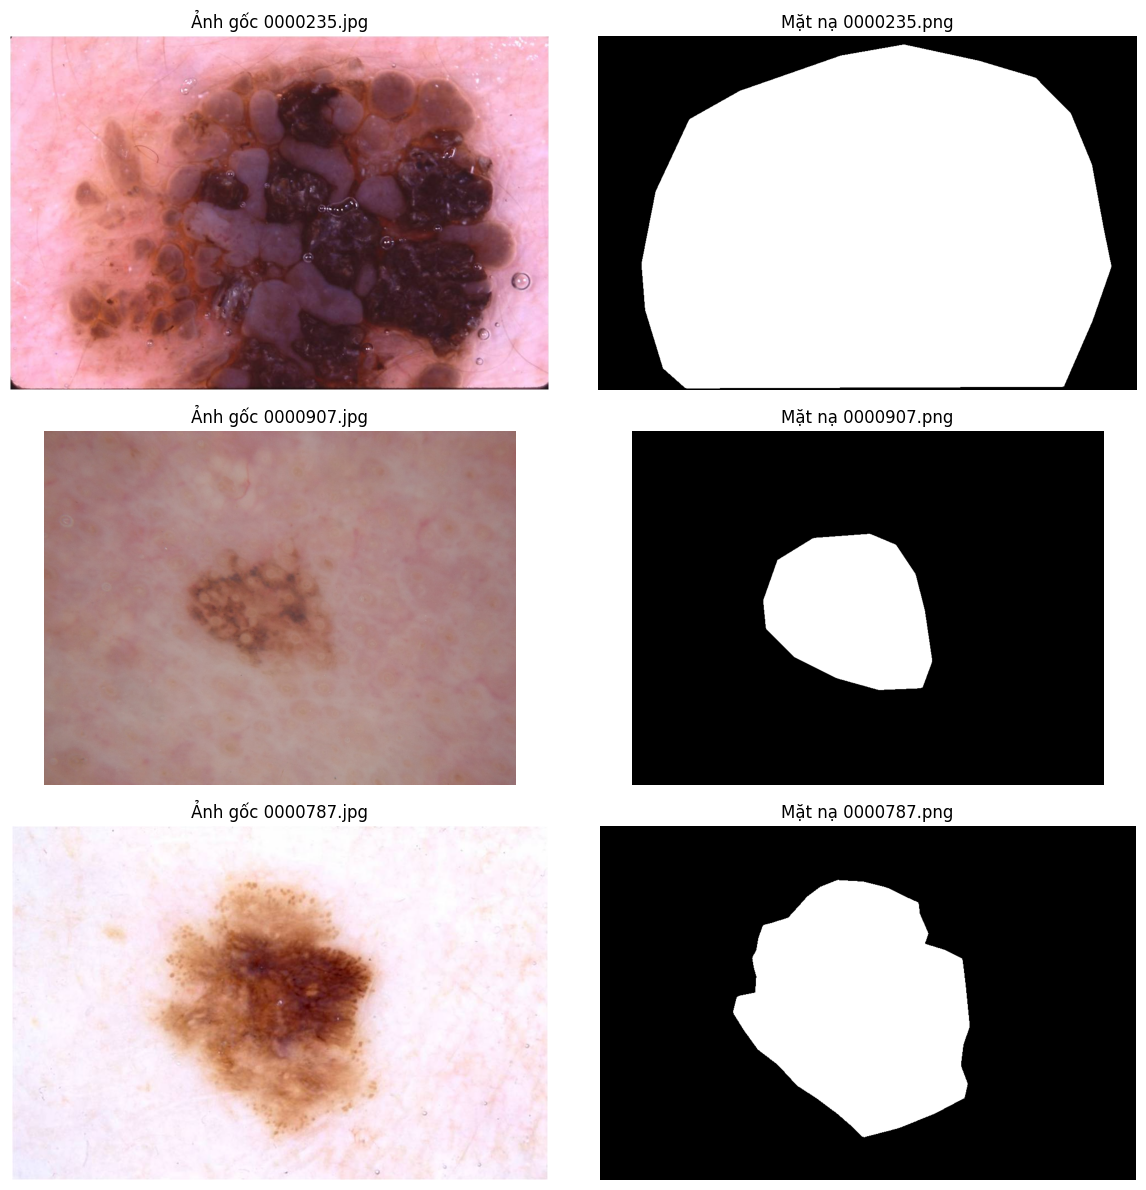

In [1]:
# Cài đặt các thư viện cần thiết
!pip install torch torchvision albumentations tqdm matplotlib -q

# Import thư viện
import os
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

# Định nghĩa đường dẫn dữ liệu
BASE_PATH = '/kaggle/input/2425-ii-ait-3002-medical-image-segmentation/Dataset'
TRAIN_IMG_DIR = os.path.join(BASE_PATH, 'Train/Image')
TRAIN_MASK_DIR = os.path.join(BASE_PATH, 'Train/Mask')
TEST_IMG_DIR = os.path.join(BASE_PATH, 'Test/Image')

# Hàm kiểm tra dữ liệu
def check_dataset():
    train_images = sorted(glob(os.path.join(TRAIN_IMG_DIR, '*.jpg')))
    train_masks = sorted(glob(os.path.join(TRAIN_MASK_DIR, '*.png')))
    test_images = sorted(glob(os.path.join(TEST_IMG_DIR, '*.jpg')))
    
    print(f"Số ảnh train: {len(train_images)}")
    print(f"Số mặt nạ train: {len(train_masks)}")
    print(f"Số ảnh test: {len(test_images)}")
    
    # Kiểm tra kích thước của một vài ảnh và mặt nạ
    sample_img = cv2.imread(train_images[0])
    sample_mask = cv2.imread(train_masks[0], cv2.IMREAD_GRAYSCALE)
    print(f"Kích thước ảnh train mẫu: {sample_img.shape}")
    print(f"Kích thước mặt nạ train mẫu: {sample_mask.shape}")
    
    return train_images, train_masks, test_images

# Hàm hiển thị ảnh và mặt nạ
def visualize_samples(train_images, train_masks, n=3):
    indices = np.random.choice(len(train_images), n, replace=False)
    plt.figure(figsize=(12, 4 * n))
    
    for i, idx in enumerate(indices):
        img = cv2.imread(train_images[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB để hiển thị đúng màu
        mask = cv2.imread(train_masks[idx], cv2.IMREAD_GRAYSCALE)
        
        # Hiển thị ảnh gốc
        plt.subplot(n, 2, 2 * i + 1)
        plt.imshow(img)
        plt.title(f'Ảnh gốc {os.path.basename(train_images[idx])}')
        plt.axis('off')
        
        # Hiển thị mặt nạ
        plt.subplot(n, 2, 2 * i + 2)
        plt.imshow(mask, cmap='gray')
        plt.title(f'Mặt nạ {os.path.basename(train_masks[idx])}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Thực thi kiểm tra và hiển thị
train_images, train_masks, test_images = check_dataset()
visualize_samples(train_images, train_masks, n=3)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.0 MB/s eta 0:00:00:00:0100:01


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Ghép được 1087 cặp ảnh và mặt nạ (từ 1087 ảnh, 1087 mặt nạ)
Số mẫu train: 869
Số mẫu validation: 218


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:00<00:00, 203MB/s] 
Epoch 1 Train: 100%|██████████| 217/217 [02:39<00:00,  1.36it/s]


Epoch 1 | Train Loss: 0.2817


Validation: 100%|██████████| 218/218 [00:15<00:00, 14.13it/s]


Epoch 1 | Val Loss: 0.1892 | Val Dice: 0.7589
Đã lưu mô hình tốt nhất!


Epoch 2 Train: 100%|██████████| 217/217 [02:40<00:00,  1.36it/s]


Epoch 2 | Train Loss: 0.1915


Validation: 100%|██████████| 218/218 [00:14<00:00, 14.65it/s]


Epoch 2 | Val Loss: 0.1578 | Val Dice: 0.8013
Đã lưu mô hình tốt nhất!


Epoch 3 Train: 100%|██████████| 217/217 [02:40<00:00,  1.35it/s]


Epoch 3 | Train Loss: 0.1561


Validation: 100%|██████████| 218/218 [00:14<00:00, 14.65it/s]


Epoch 3 | Val Loss: 0.1325 | Val Dice: 0.8379
Đã lưu mô hình tốt nhất!


Epoch 4 Train: 100%|██████████| 217/217 [02:39<00:00,  1.36it/s]


Epoch 4 | Train Loss: 0.1406


Validation: 100%|██████████| 218/218 [00:14<00:00, 14.62it/s]


Epoch 4 | Val Loss: 0.1311 | Val Dice: 0.8580
Đã lưu mô hình tốt nhất!


Epoch 5 Train: 100%|██████████| 217/217 [02:39<00:00,  1.36it/s]


Epoch 5 | Train Loss: 0.1365


Validation: 100%|██████████| 218/218 [00:14<00:00, 14.64it/s]


Epoch 5 | Val Loss: 0.1246 | Val Dice: 0.8521


Epoch 6 Train: 100%|██████████| 217/217 [02:39<00:00,  1.36it/s]


Epoch 6 | Train Loss: 0.1119


Validation: 100%|██████████| 218/218 [00:14<00:00, 14.63it/s]


Epoch 6 | Val Loss: 0.1288 | Val Dice: 0.8541


Epoch 7 Train: 100%|██████████| 217/217 [02:39<00:00,  1.36it/s]


Epoch 7 | Train Loss: 0.1067


Validation: 100%|██████████| 218/218 [00:14<00:00, 14.66it/s]


Epoch 7 | Val Loss: 0.1490 | Val Dice: 0.8275


Epoch 8 Train: 100%|██████████| 217/217 [02:39<00:00,  1.36it/s]


Epoch 8 | Train Loss: 0.1113


Validation: 100%|██████████| 218/218 [00:14<00:00, 14.59it/s]


Epoch 8 | Val Loss: 0.1049 | Val Dice: 0.8763
Đã lưu mô hình tốt nhất!


Epoch 9 Train: 100%|██████████| 217/217 [02:39<00:00,  1.36it/s]


Epoch 9 | Train Loss: 0.0942


Validation: 100%|██████████| 218/218 [00:14<00:00, 14.67it/s]


Epoch 9 | Val Loss: 0.1061 | Val Dice: 0.8805
Đã lưu mô hình tốt nhất!


Epoch 10 Train: 100%|██████████| 217/217 [02:39<00:00,  1.36it/s]


Epoch 10 | Train Loss: 0.0857


Validation: 100%|██████████| 218/218 [00:14<00:00, 14.72it/s]


Epoch 10 | Val Loss: 0.0981 | Val Dice: 0.8891
Đã lưu mô hình tốt nhất!


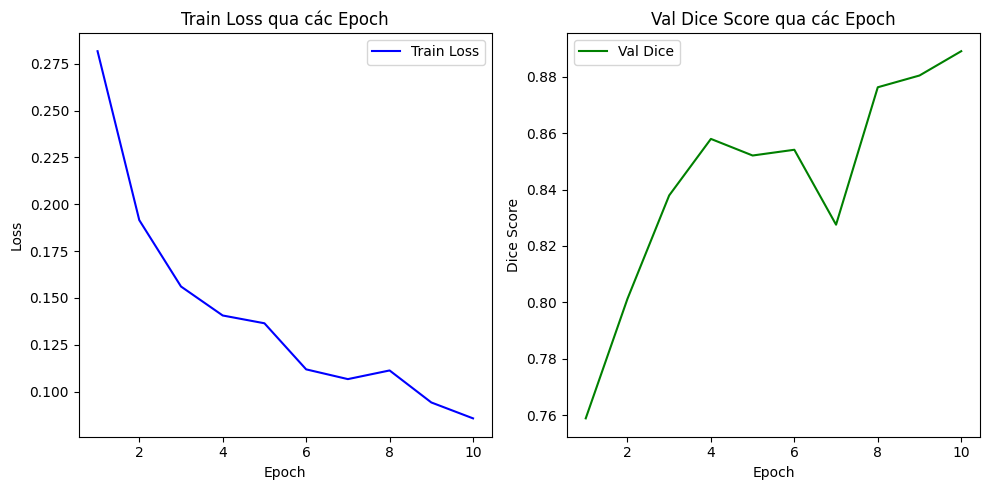

Tạo submission: 100%|██████████| 192/192 [00:20<00:00,  9.43it/s]


Đã tạo file submission.csv
Số ảnh train: 1087
Số mặt nạ train: 1087
Số ảnh test: 192
Kích thước ảnh train mẫu: (802, 919, 3)
Kích thước mặt nạ train mẫu: (802, 919)


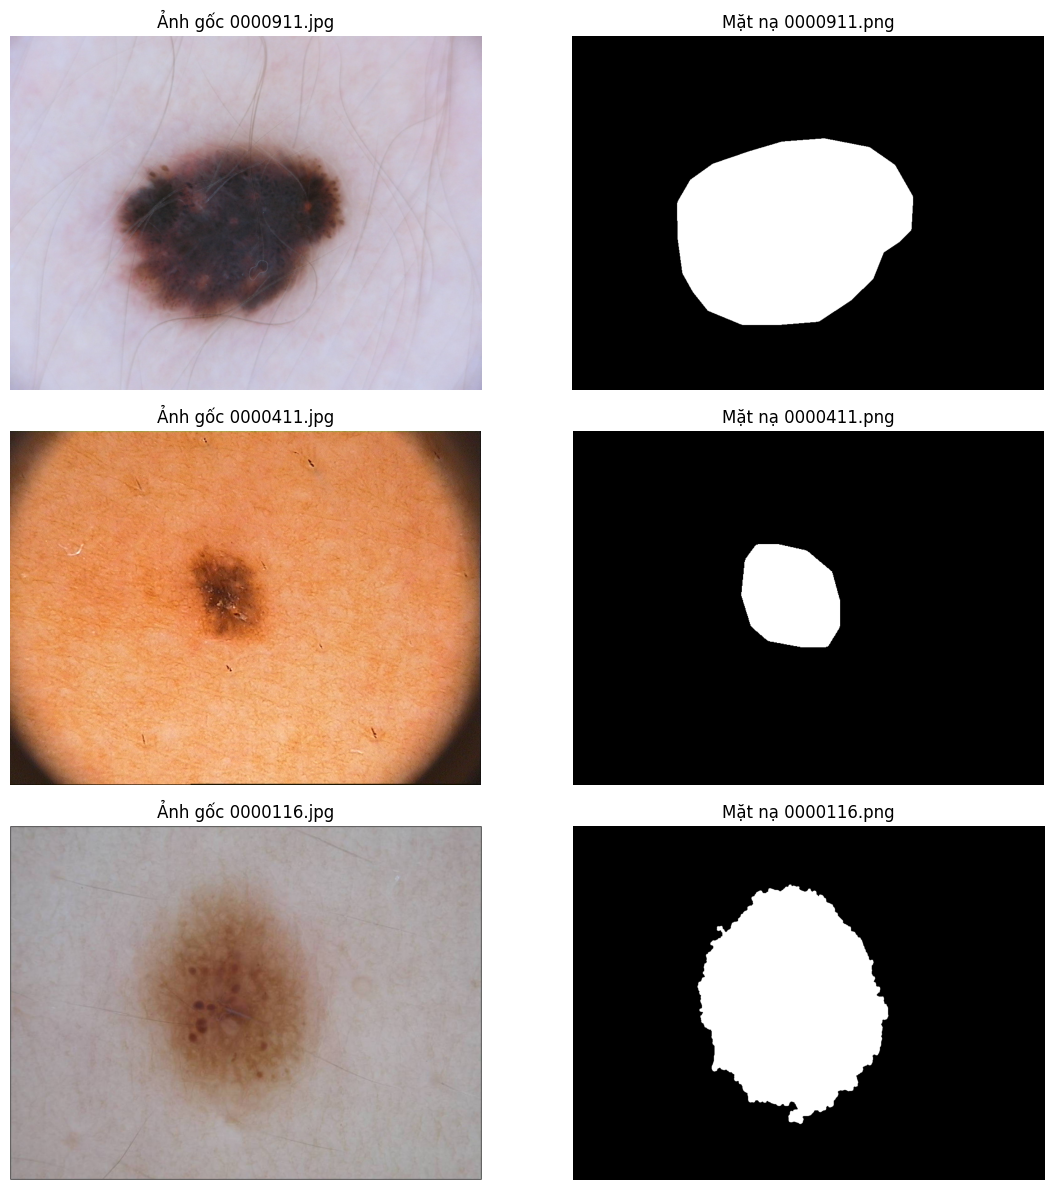

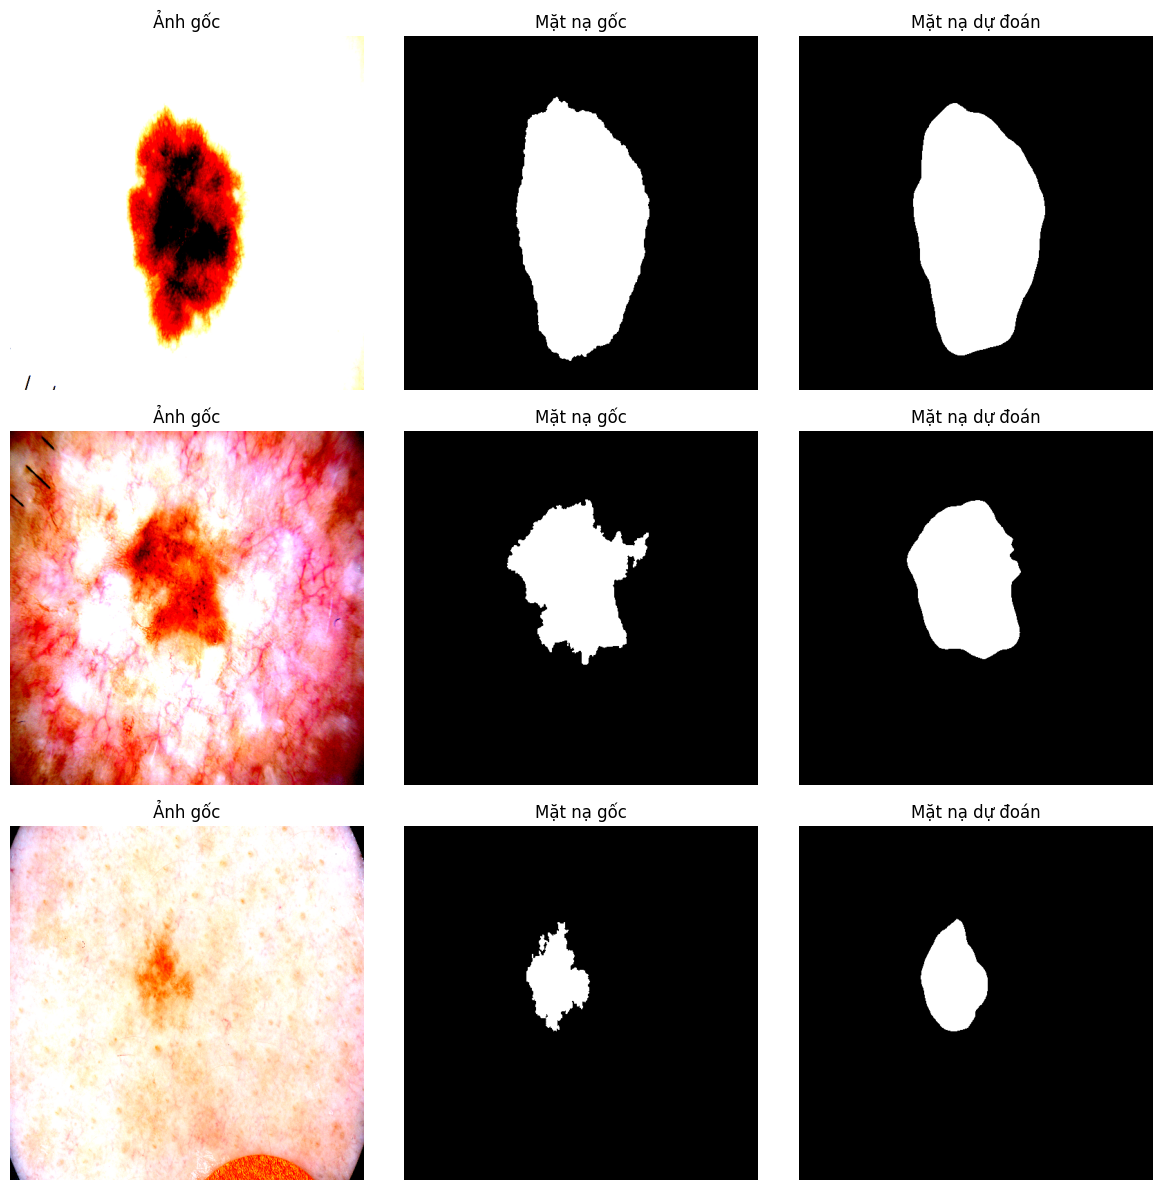

In [2]:
# Cài đặt các thư viện cần thiết
!pip install torch torchvision albumentations tqdm matplotlib -q

# Import thư viện
import os
import cv2
import numpy as np
from glob import glob
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision.models.segmentation import deeplabv3_resnet50
import matplotlib.pyplot as plt
import pandas as pd

# Tắt cảnh báo cập nhật albumentations
os.environ['NO_ALBUMENTATIONS_UPDATE'] = '1'

# Định nghĩa đường dẫn dữ liệu
BASE_PATH = '/kaggle/input/2425-ii-ait-3002-medical-image-segmentation/Dataset'
TRAIN_IMG_DIR = os.path.join(BASE_PATH, 'Train/Image')
TRAIN_MASK_DIR = os.path.join(BASE_PATH, 'Train/Mask')
TEST_IMG_DIR = os.path.join(BASE_PATH, 'Test/Image')

# Hàm kiểm tra dữ liệu
def check_dataset():
    train_images = sorted(glob(os.path.join(TRAIN_IMG_DIR, '*.jpg')))
    train_masks = sorted(glob(os.path.join(TRAIN_MASK_DIR, '*.png')))
    test_images = sorted(glob(os.path.join(TEST_IMG_DIR, '*.jpg')))
    
    print(f"Số ảnh train: {len(train_images)}")
    print(f"Số mặt nạ train: {len(train_masks)}")
    print(f"Số ảnh test: {len(test_images)}")
    
    # Kiểm tra kích thước của một vài ảnh và mặt nạ
    sample_img = cv2.imread(train_images[0])
    sample_mask = cv2.imread(train_masks[0], cv2.IMREAD_GRAYSCALE)
    print(f"Kích thước ảnh train mẫu: {sample_img.shape}")
    print(f"Kích thước mặt nạ train mẫu: {sample_mask.shape}")
    
    return train_images, train_masks, test_images

# Hàm hiển thị ảnh và mặt nạ (đã sửa lỗi)
def visualize_samples(train_images, train_masks, n=3):
    indices = np.random.choice(len(train_images), n, replace=False)
    plt.figure(figsize=(12, 4 * n))
    
    for i, idx in enumerate(indices):
        img = cv2.imread(train_images[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(train_masks[idx], cv2.IMREAD_GRAYSCALE)
        
        plt.subplot(n, 2, 2 * i + 1)
        plt.imshow(img)
        plt.title(f'Ảnh gốc {os.path.basename(train_images[idx])}')
        plt.axis('off')
        
        plt.subplot(n, 2, 2 * i + 2)
        plt.imshow(mask, cmap='gray')  # Sửa lỗi từ mask0 thành mask
        plt.title(f'Mặt nạ {os.path.basename(train_masks[idx])}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Hàm ghép cặp ảnh và mặt nạ
def make_pairs(img_dir, mask_dir):
    img_paths = sorted(glob(os.path.join(img_dir, '*.jpg')))
    mask_paths = sorted(glob(os.path.join(mask_dir, '*.png')))
    paired = []
    for img_p in img_paths:
        img_base = os.path.splitext(os.path.basename(img_p))[0]
        match = [m for m in mask_paths if os.path.splitext(os.path.basename(m))[0] == img_base]
        if match:
            paired.append((img_p, match[0]))
    print(f"Ghép được {len(paired)} cặp ảnh và mặt nạ (từ {len(img_paths)} ảnh, {len(mask_paths)} mặt nạ)")
    return paired

# Tạo danh sách cặp ảnh và mặt nạ
train_pairs = make_pairs(TRAIN_IMG_DIR, TRAIN_MASK_DIR)

# Dataset class
class MedicalDataset(Dataset):
    def __init__(self, pairs, transforms=None):
        self.pairs = pairs
        self.transforms = transforms
    
    def __len__(self):
        return len(self.pairs)
    
    def __getitem__(self, idx):
        img_path, mask_path = self.pairs[idx]
        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None or mask is None:
            raise ValueError(f"Không đọc được {img_path} hoặc {mask_path}")
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        mask = (mask > 127).astype(np.float32)
        
        if self.transforms:
            aug = self.transforms(image=img, mask=mask)
            img, mask = aug['image'], aug['mask']
        
        return img, mask.unsqueeze(0)

# Transforms
train_transforms = A.Compose([
    A.Resize(512, 512),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Normalize(),
    ToTensorV2(),
])

val_transforms = A.Compose([
    A.Resize(512, 512),
    A.Normalize(),
    ToTensorV2(),
])

# Chia tập train/validation
train_size = int(0.8 * len(train_pairs))
val_size = len(train_pairs) - train_size
train_pairs, val_pairs = train_pairs[:train_size], train_pairs[train_size:]

train_ds = MedicalDataset(train_pairs, transforms=train_transforms)
val_ds = MedicalDataset(val_pairs, transforms=val_transforms)

print(f"Số mẫu train: {len(train_ds)}")
print(f"Số mẫu validation: {len(val_ds)}")

# DataLoader với drop_last=True
train_loader = DataLoader(train_ds, batch_size=4, shuffle=True, num_workers=2, drop_last=True)
val_loader = DataLoader(val_ds, batch_size=1, shuffle=False, num_workers=2)

# Hàm tính Dice coefficient
def dice_score(pred, target, smooth=1e-6):
    pred_flat = torch.sigmoid(pred).view(-1)
    target_flat = target.view(-1)
    inter = (pred_flat * target_flat).sum()
    return ((2 * inter + smooth) / (pred_flat.sum() + target_flat.sum() + smooth)).item()

# Khởi tạo mô hình
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = deeplabv3_resnet50(weights='COCO_WITH_VOC_LABELS_V1')
model.classifier[-1] = nn.Conv2d(256, 1, kernel_size=1)
model.aux_classifier[-1] = nn.Conv2d(256, 1, kernel_size=1)
model = model.to(device)

bce_loss = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Lưu trữ loss và Dice để vẽ biểu đồ
train_losses = []
val_dices = []

# Training và Validation
EPOCHS = 10
best_val_dice = 0.0
for epoch in range(1, EPOCHS + 1):
    model.train()
    train_loss = 0.0
    for imgs, masks in tqdm(train_loader, desc=f"Epoch {epoch} Train"):
        imgs, masks = imgs.to(device), masks.to(device)
        optimizer.zero_grad()
        out = model(imgs)['out']
        loss = bce_loss(out, masks) * 0.5 + (1 - dice_score(out, masks)) * 0.5
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"Epoch {epoch} | Train Loss: {avg_train_loss:.4f}")
    
    model.eval()
    val_loss = 0.0
    val_dice = []
    with torch.no_grad():
        for imgs, masks in tqdm(val_loader, desc="Validation"):
            imgs, masks = imgs.to(device), masks.to(device)
            out = model(imgs)['out']
            loss = bce_loss(out, masks) * 0.5 + (1 - dice_score(out, masks)) * 0.5
            val_loss += loss.item()
            dice = dice_score(out, masks)
            val_dice.append(dice)
    
    avg_val_loss = val_loss / len(val_loader)
    avg_val_dice = np.mean(val_dice)
    val_dices.append(avg_val_dice)
    print(f"Epoch {epoch} | Val Loss: {avg_val_loss:.4f} | Val Dice: {avg_val_dice:.4f}")
    
    if avg_val_dice > best_val_dice:
        best_val_dice = avg_val_dice
        torch.save(model.state_dict(), 'best_model.pth')
        print("Đã lưu mô hình tốt nhất!")

# Vẽ biểu đồ train loss và val Dice
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), train_losses, label='Train Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss qua các Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), val_dices, label='Val Dice', color='green')
plt.xlabel('Epoch')
plt.ylabel('Dice Score')
plt.title('Val Dice Score qua các Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Tạo submission
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

test_images = sorted(glob(os.path.join(TEST_IMG_DIR, '*.jpg')))
submission = []

def mask_to_rle(mask):
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return " ".join(map(str, runs))

with torch.no_grad():
    for img_path in tqdm(test_images, desc="Tạo submission"):
        img_id = os.path.splitext(os.path.basename(img_path))[0]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        aug = val_transforms(image=img)
        img_tensor = aug['image'].unsqueeze(0).to(device)
        
        out = model(img_tensor)['out']
        pred_mask = torch.sigmoid(out).cpu().numpy()[0, 0]
        pred_mask = (pred_mask > 0.5).astype(np.uint8)
        rle = mask_to_rle(pred_mask)
        submission.append([img_id, rle])

submission_df = pd.DataFrame(submission, columns=['ID', 'Mask'])
submission_df.to_csv('submission.csv', index=False)
print("Đã tạo file submission.csv")

# Hiển thị dự đoán
def visualize_predictions(model, dataset, device, n=3):
    model.eval()
    indices = np.random.choice(len(dataset), n, replace=False)
    plt.figure(figsize=(12, 4 * n))
    
    with torch.no_grad():
        for i, idx in enumerate(indices):
            img, mask = dataset[idx]
            img_tensor = img.unsqueeze(0).to(device)
            out = torch.sigmoid(model(img_tensor)['out'])[0, 0].cpu().numpy()
            pred_mask = (out > 0.5).astype(np.uint8)
            
            plt.subplot(n, 3, 3 * i + 1)
            plt.imshow(img.permute(1, 2, 0).numpy())
            plt.title('Ảnh gốc')
            plt.axis('off')
            
            plt.subplot(n, 3, 3 * i + 2)
            plt.imshow(mask[0].numpy(), cmap='gray')
            plt.title('Mặt nạ gốc')
            plt.axis('off')
            
            plt.subplot(n, 3, 3 * i + 3)
            plt.imshow(pred_mask, cmap='gray')
            plt.title('Mặt nạ dự đoán')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Kiểm tra và hiển thị dữ liệu
train_images, train_masks, test_images = check_dataset()
visualize_samples(train_images, train_masks, n=3)

# Hiển thị dự đoán sau khi train
visualize_predictions(model, val_ds, device, n=3)

Số ảnh test: 192
Kích thước ảnh test mẫu: (768, 1024, 3)
Kiểm tra một vài RLE encoding mẫu:


Tạo submission:   1%|          | 1/192 [00:00<00:30,  6.20it/s]

ID: 0001087, RLE mẫu: 30433 16 30938 30 31435 52 31941 62 32449 70 32957...


Tạo submission:   2%|▏         | 3/192 [00:00<00:17, 10.56it/s]

ID: 0001088, RLE mẫu: 49903 7 50402 27 50908 35 51395 62 51905 67 52415 ...
ID: 0001089, RLE mẫu: 28459 2 28964 12 29474 15 29984 19 30494 22 31005 ...


Tạo submission: 100%|██████████| 192/192 [00:12<00:00, 14.87it/s]


Đã tạo file submission.csv
Kích thước file submission: 192 dòng


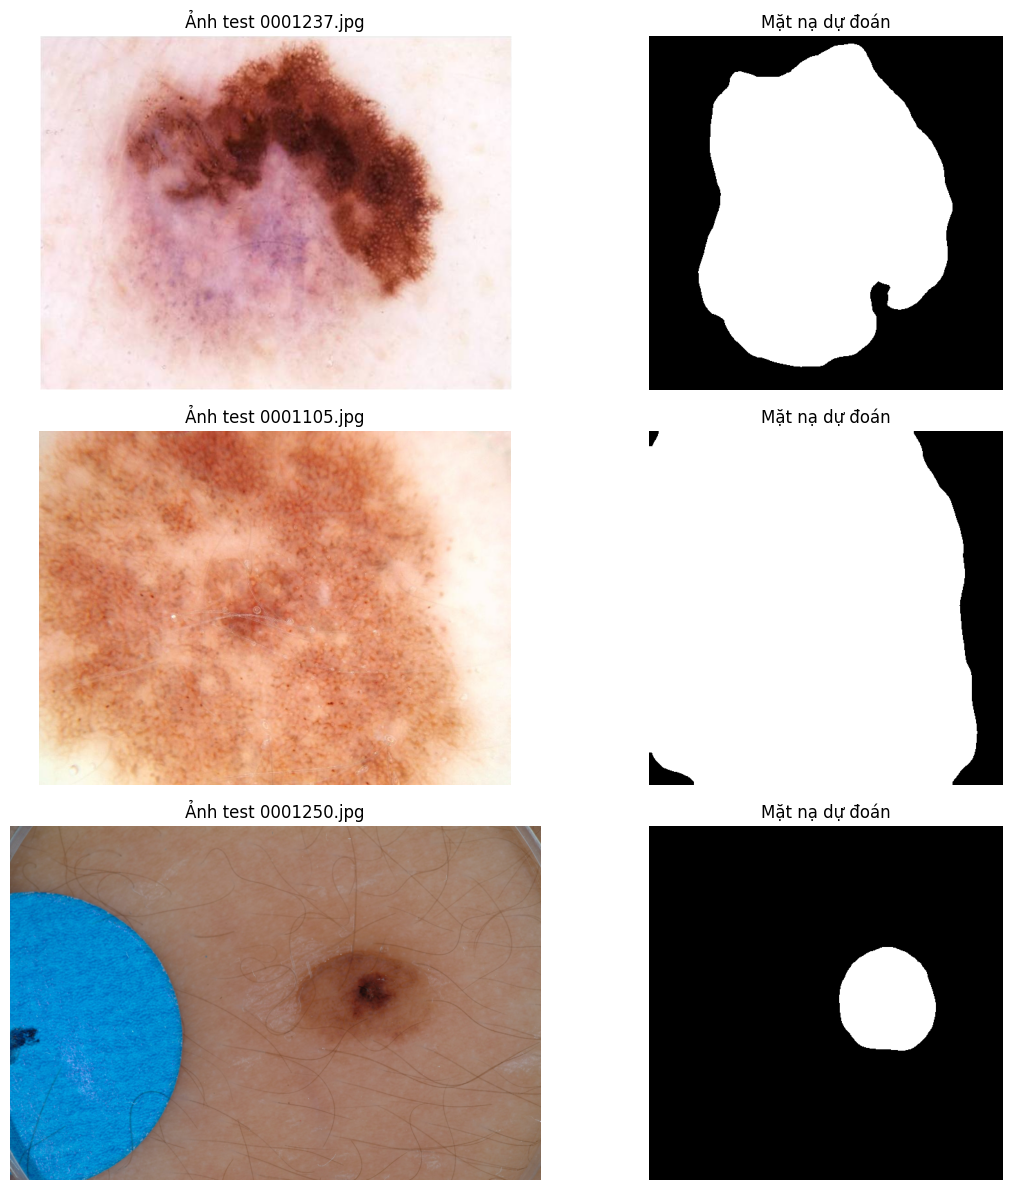

In [4]:


# Import thư viện
import os
import cv2
import numpy as np
from glob import glob
from tqdm import tqdm
import torch
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision.models.segmentation import deeplabv3_resnet50
import matplotlib.pyplot as plt
import pandas as pd

# Tắt cảnh báo cập nhật albumentations
os.environ['NO_ALBUMENTATIONS_UPDATE'] = '1'

# Định nghĩa đường dẫn dữ liệu
BASE_PATH = '/kaggle/input/2425-ii-ait-3002-medical-image-segmentation/Dataset'
TEST_IMG_DIR = os.path.join(BASE_PATH, 'Test/Image')

# Hàm kiểm tra dữ liệu test
def check_test_dataset():
    test_images = sorted(glob(os.path.join(TEST_IMG_DIR, '*.jpg')))
    print(f"Số ảnh test: {len(test_images)}")
    
    # Kiểm tra kích thước ảnh test mẫu
    sample_test_img = cv2.imread(test_images[0])
    print(f"Kích thước ảnh test mẫu: {sample_test_img.shape}")
    
    return test_images

# Dataset class cho tập test
class TestDataset(Dataset):
    def __init__(self, image_paths, transforms=None):
        self.image_paths = image_paths
        self.transforms = transforms
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        if self.transforms:
            aug = self.transforms(image=img)
            img = aug['image']
        
        return img, img_path

# Hàm hiển thị dự đoán trên tập test
def visualize_test_predictions(model, test_images, transforms, device, n=3):
    model.eval()
    indices = np.random.choice(len(test_images), n, replace=False)
    plt.figure(figsize=(12, 4 * n))
    
    with torch.no_grad():
        for i, idx in enumerate(indices):
            img_path = test_images[idx]
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            aug = transforms(image=img)
            img_tensor = aug['image'].unsqueeze(0).to(device)
            
            out = torch.sigmoid(model(img_tensor)['out'])[0, 0].cpu().numpy()
            pred_mask = (out > 0.5).astype(np.uint8)
            
            plt.subplot(n, 2, 2 * i + 1)
            plt.imshow(img)
            plt.title(f'Ảnh test {os.path.basename(img_path)}')
            plt.axis('off')
            
            plt.subplot(n, 2, 2 * i + 2)
            plt.imshow(pred_mask, cmap='gray')
            plt.title(f'Mặt nạ dự đoán')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Hàm RLE encoding
def mask_to_rle(mask):
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return " ".join(map(str, runs))

# Transforms cho test
test_transforms = A.Compose([
    A.Resize(512, 512),
    A.Normalize(),
    ToTensorV2(),
])

# Tải dữ liệu test
test_images = check_test_dataset()
test_ds = TestDataset(test_images, transforms=test_transforms)
test_loader = DataLoader(test_ds, batch_size=1, shuffle=False, num_workers=2)

# Khởi tạo mô hình
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = deeplabv3_resnet50(weights='COCO_WITH_VOC_LABELS_V1')
model.classifier[-1] = nn.Conv2d(256, 1, kernel_size=1)
model.aux_classifier[-1] = nn.Conv2d(256, 1, kernel_size=1)
model = model.to(device)

# Tải trọng số mô hình đã train
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# Tạo và kiểm tra submission
submission = []
print("Kiểm tra một vài RLE encoding mẫu:")
with torch.no_grad():
    for imgs, img_paths in tqdm(test_loader, desc="Tạo submission"):
        imgs = imgs.to(device)
        img_path = img_paths[0]
        img_id = os.path.splitext(os.path.basename(img_path))[0]
        
        out = model(imgs)['out']
        pred_mask = torch.sigmoid(out).cpu().numpy()[0, 0]
        pred_mask = (pred_mask > 0.5).astype(np.uint8)
        rle = mask_to_rle(pred_mask)
        submission.append([img_id, rle])
        
        # In 3 RLE mẫu
        if len(submission) <= 3:
            print(f"ID: {img_id}, RLE mẫu: {rle[:50]}...")

# Lưu file submission
submission_df = pd.DataFrame(submission, columns=['ID', 'Mask'])
submission_df.to_csv('submission.csv', index=False)
print("Đã tạo file submission.csv")
print(f"Kích thước file submission: {len(submission_df)} dòng")

# Hiển thị dự đoán trên tập test
visualize_test_predictions(model, test_images, test_transforms, device, n=3)

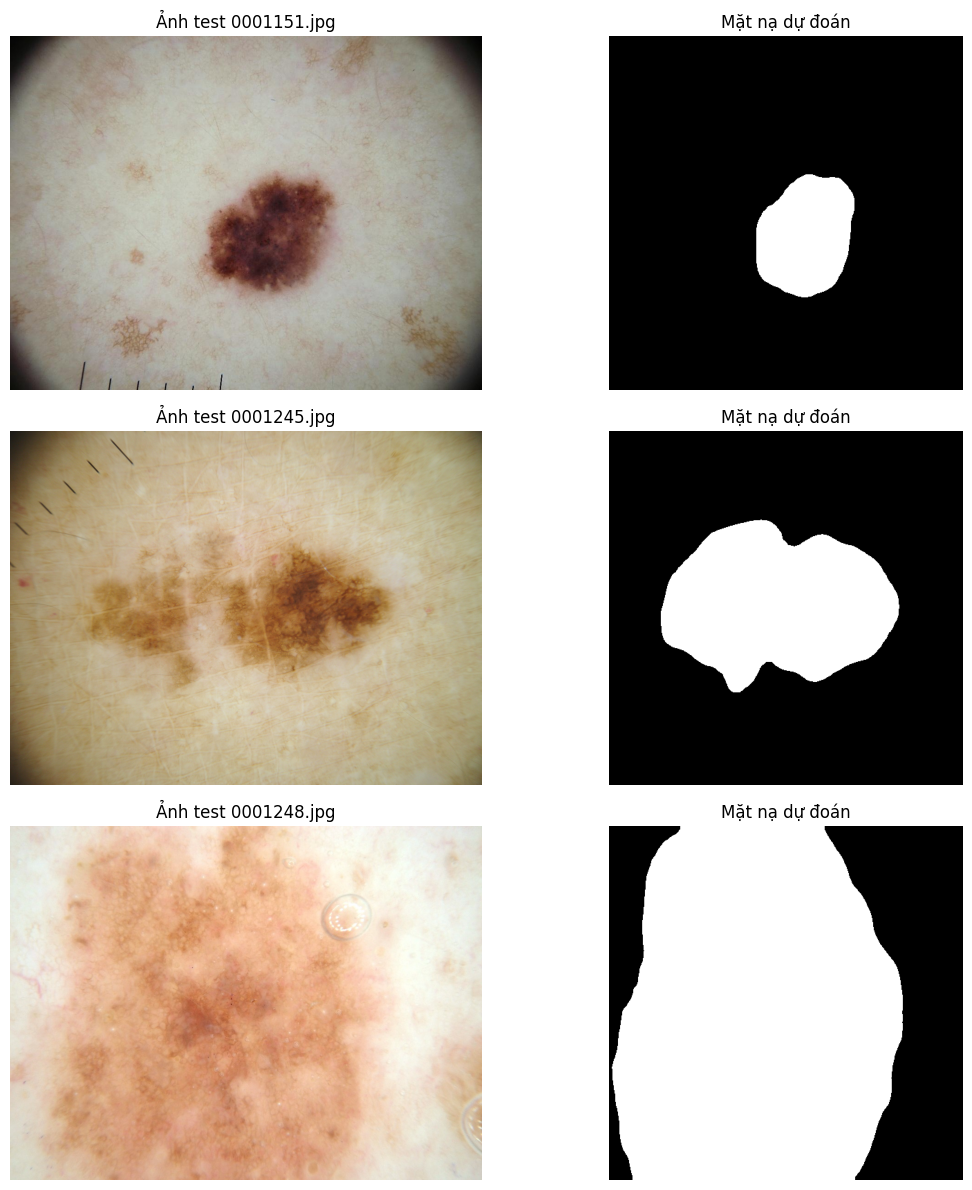

In [5]:
# Hiển thị dự đoán trên tập test
visualize_test_predictions(model, test_images, test_transforms, device, n=3)